### Problem Statement:
our goal is to build a machine learning model that is able to predict churning customers based on the features provided to us.

### Steps:
Following are the steps that we will be following for our prediction:
1. Reading the data
2. Understanding the data
3. Dealing with columns with same values in the entire dataset
4. Missing value Treatment
5. Filtering High-Value Customers
6. Outlier Treatment
7. Deriving new features
8. Exploratory Data Analysis:
9. Train - Test Split & Scaling
10. Model Building
11. PCA
   - PCA with Logistic regression
   - Random Forest with PCA:
12. Logistic regression without pca
13. Testing on unseen data and storing the result in a .csv file
14. Frature importance
15. Conclusion.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

 ####  1. Reading the data.

In [2]:
df = pd.read_csv('train.csv')
df.shape

(69999, 172)

As we can see there are 172 columns and in order to view all the columns in our output, we will use pandas set_option method which will help us to view all the 172 columns as follows:

In [3]:
pd.set_option("display.max_columns",300)
pd.set_option("display.max_rows",300)

#### 2. Understanding the data

In [4]:
df.head(10)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.00,0.00,0.00,0.00,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.00,0.00,0.00,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.00,0.00,0.00,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [6]:
df.dtypes

id                            int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
loc_og_t2t_mou_6            float64
loc_og_t2t_mou_7            float64
loc_og_t2t_mou_8            float64
loc_og_t2m_mou_6            float64
loc_og_t2m_mou_7            

#### 3. Dealing with columns with same values in the entire dataset

In [7]:
df.circle_id.value_counts()

109    69999
Name: circle_id, dtype: int64

In [8]:
df.loc_og_t2o_mou.value_counts()

0.0    69297
Name: loc_og_t2o_mou, dtype: int64

In [9]:
df.std_og_t2o_mou.value_counts()

0.0    69297
Name: std_og_t2o_mou, dtype: int64

In [10]:
df.loc_ic_t2o_mou.value_counts()


0.0    69297
Name: loc_ic_t2o_mou, dtype: int64

In [11]:
df.last_date_of_month_6.value_counts()

6/30/2014    69999
Name: last_date_of_month_6, dtype: int64

In [12]:

df.last_date_of_month_7.value_counts()

7/31/2014    69600
Name: last_date_of_month_7, dtype: int64

In [13]:

df.last_date_of_month_8.value_counts()

8/31/2014    69266
Name: last_date_of_month_8, dtype: int64

In [14]:
df.std_og_t2c_mou_6.value_counts()

0.0    67231
Name: std_og_t2c_mou_6, dtype: int64

In [15]:
df.std_og_t2c_mou_7.value_counts()

0.0    67312
Name: std_og_t2c_mou_7, dtype: int64

In [16]:
df.std_og_t2c_mou_8.value_counts()

0.0    66296
Name: std_og_t2c_mou_8, dtype: int64

In [17]:
df.std_ic_t2o_mou_6.value_counts()

0.0    67231
Name: std_ic_t2o_mou_6, dtype: int64

In [18]:
df.std_ic_t2o_mou_7.value_counts()

0.0    67312
Name: std_ic_t2o_mou_7, dtype: int64

In [19]:
df.std_ic_t2o_mou_8.value_counts()

0.0    66296
Name: std_ic_t2o_mou_8, dtype: int64

#### Deleting the above columns as they have same value throughout the dataset.
Here as we can see, all the above columns have the same value in almost the entire dataset, so such columns will not contribute in our prediction. Hence, dropping these 13 columns.

In [20]:
df = df.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'],axis=1)

In [21]:
#dropping Id column:
df=df.drop('id',axis=1)

In [22]:
df.shape

(69999, 158)

Now we will also delete the last recharge date column as It wont help much in model building

In [23]:
df = df.drop(['date_of_last_rech_8','date_of_last_rech_7','date_of_last_rech_6'],axis=1)

### 4. Missing value Treatment:

In [24]:
null_df=round(((df.isnull().sum()/len(df.index))*100),2).to_frame("Null Percentage").sort_values("Null Percentage",ascending= False)

In [25]:
null_df

,Null Percentage
arpu_3g_6,74.90
arpu_2g_6,74.90
fb_user_6,74.90
night_pck_user_6,74.90
date_of_last_rech_data_6,74.90
total_rech_data_6,74.90
av_rech_amt_data_6,74.90
max_rech_data_6,74.90
count_rech_3g_6,74.90
count_rech_2g_6,74.90


Dropping those columns that have null values more than 30%:

In [26]:
df=df.drop(list(null_df.index[null_df["Null Percentage"]>30]),axis=1)

In [27]:
df.shape

(69999, 125)

### 5. Filtering High-Value Customers

In our case, High value customers will be those whose average recharge amount will be greater than 70 percentile.

In [28]:
# Creating a new column for average recharge amount of 6th and 7th month.
df['avg_rech_amnt_6&7'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2

In [29]:
#Now we will filter the high value customers based on the 70th percentile condition:
df=df[df['avg_rech_amnt_6&7'] >= (df['avg_rech_amnt_6&7'].quantile(0.7))]

In [30]:
df.shape

(21018, 126)

We have arount 21K high value customers

Checking the missing values on rows for the new dataset.

In [31]:
# Deleting the rows having more than 50% of missing values
df=df.drop(df[(df.isnull().sum(axis=1))>(len(df.columns)//2)].index)

In [32]:
df.shape

(20938, 126)

In [33]:
null_df=round(((df.isnull().sum()/len(df.index))*100),2).to_frame("Null Percentage").sort_values("Null Percentage",ascending= False)
null_df.head(60)

,Null Percentage
loc_og_t2m_mou_8,2.75
loc_og_mou_8,2.75
loc_ic_t2m_mou_8,2.75
loc_og_t2c_mou_8,2.75
loc_ic_t2f_mou_8,2.75
loc_og_t2f_mou_8,2.75
loc_ic_mou_8,2.75
std_og_t2t_mou_8,2.75
std_og_mou_8,2.75
std_ic_t2t_mou_8,2.75


Here we can notice that the Minute Of Usage (MOU) for months of June,July & August for all call types are having missing values in certain amount.

Now we will select the records for all the three months where they have missing values and drop those records.

In [34]:
df.shape

(20938, 126)

In [35]:
# Listing MOU columns for August(8)
print(((null_df[null_df['Null Percentage'] == 2.75]).index).to_list())

['loc_og_t2m_mou_8', 'loc_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_og_t2c_mou_8', 'loc_ic_t2f_mou_8', 'loc_og_t2f_mou_8', 'loc_ic_mou_8', 'std_og_t2t_mou_8', 'std_og_mou_8', 'std_ic_t2t_mou_8', 'og_others_8', 'loc_og_t2t_mou_8', 'std_ic_t2m_mou_8', 'roam_og_mou_8', 'std_ic_t2f_mou_8', 'std_og_t2m_mou_8', 'roam_ic_mou_8', 'std_ic_mou_8', 'spl_og_mou_8', 'offnet_mou_8', 'spl_ic_mou_8', 'isd_og_mou_8', 'onnet_mou_8', 'isd_ic_mou_8', 'std_og_t2f_mou_8', 'ic_others_8', 'loc_ic_t2t_mou_8']


In [36]:
# Creating null Df for August(8)
df_null_8=df[(df['loc_ic_mou_8'].isnull()) & (df['loc_og_t2m_mou_8'].isnull()) & (df['loc_og_t2c_mou_8'].isnull()) & (df['loc_og_mou_8'].isnull()) & (df['std_og_t2t_mou_8'].isnull()) & (df['std_og_t2m_mou_8'].isnull()) & (df['std_og_t2f_mou_8'].isnull()) & (df['std_og_mou_8'].isnull()) & (df['og_others_8'].isnull()) & (df['loc_ic_t2t_mou_8'].isnull()) & (df['loc_ic_t2m_mou_8'].isnull()) & (df['loc_ic_t2f_mou_8'].isnull()) & (df['std_ic_t2t_mou_8'].isnull()) & (df['std_ic_t2m_mou_8'].isnull()) & (df['std_ic_t2f_mou_8'].isnull()) & (df['std_ic_mou_8'].isnull()) & (df['spl_ic_mou_8'].isnull()) & (df['isd_ic_mou_8'].isnull()) & (df['ic_others_8'].isnull()) & (df['loc_og_t2f_mou_8'].isnull()) & (df['spl_og_mou_8'].isnull()) & (df['roam_ic_mou_8'].isnull()) & (df['onnet_mou_8'].isnull()) & (df['roam_og_mou_8'].isnull()) & (df['loc_og_t2t_mou_8'].isnull()) & (df['offnet_mou_8'].isnull())]
df_null_8.shape

(575, 126)

In [37]:
# Deleting these null records for august
df = df.drop(df_null_8.index)

In [38]:
# Listing MOU columns for July(7)
print(((null_df[null_df['Null Percentage'] == 0.61]).index).to_list())

['spl_ic_mou_7', 'offnet_mou_7', 'roam_ic_mou_7', 'std_ic_t2t_mou_7', 'roam_og_mou_7', 'std_ic_t2f_mou_7', 'isd_ic_mou_7', 'onnet_mou_7', 'loc_og_t2t_mou_7', 'std_ic_t2m_mou_7', 'ic_others_7', 'loc_og_t2m_mou_7', 'std_ic_mou_7', 'std_og_mou_7', 'loc_og_t2f_mou_7', 'og_others_7', 'loc_ic_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_ic_t2m_mou_7', 'loc_og_mou_7', 'loc_ic_t2t_mou_7', 'std_og_t2t_mou_7', 'isd_og_mou_7', 'std_og_t2f_mou_7', 'loc_ic_mou_7', 'spl_og_mou_7', 'std_og_t2m_mou_7']


In [39]:
# Creating null Df for July(7)
df_null_7=df[(df['loc_og_mou_7'].isnull()) & (df['offnet_mou_7'].isnull()) & (df['std_og_t2t_mou_7'].isnull()) & (df['std_ic_t2f_mou_7'].isnull()) & (df['spl_og_mou_7'].isnull()) & (df['std_ic_mou_7'].isnull()) & (df['spl_ic_mou_7'].isnull()) & (df['onnet_mou_7'].isnull()) & (df['loc_og_t2c_mou_7'].isnull()) & (df['isd_ic_mou_7'].isnull()) & (df['loc_og_t2m_mou_7'].isnull()) & (df['ic_others_7'].isnull()) & (df['std_ic_t2m_mou_7'].isnull()) & (df['loc_og_t2t_mou_7'].isnull()) & (df['loc_og_t2f_mou_7'].isnull()) & (df['loc_ic_t2m_mou_7'].isnull()) & (df['roam_og_mou_7'].isnull()) & (df['std_og_mou_7'].isnull()) & (df['loc_ic_t2t_mou_7'].isnull()) & (df['std_ic_t2t_mou_7'].isnull()) & (df['og_others_7'].isnull()) & (df['isd_og_mou_7'].isnull()) & (df['roam_ic_mou_7'].isnull()) & (df['std_og_t2f_mou_7'].isnull()) & (df['loc_ic_t2f_mou_7'].isnull()) & (df['loc_ic_mou_7'].isnull()) & (df['std_og_t2m_mou_7'].isnull())]
df_null_7.shape

(44, 126)

In [40]:
# Dropping these null records for July
df = df.drop(df_null_7.index)

In [41]:
# Listing MOU columns for June(6)
print(((null_df[null_df['Null Percentage'] == 0.68]).index).to_list())

['og_others_6', 'loc_ic_t2t_mou_6', 'loc_ic_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6', 'isd_og_mou_6', 'spl_og_mou_6', 'loc_og_t2f_mou_6', 'std_og_t2m_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2c_mou_6', 'loc_og_t2t_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'roam_og_mou_6', 'roam_ic_mou_6', 'std_og_mou_6', 'offnet_mou_6', 'std_og_t2f_mou_6', 'onnet_mou_6']


In [42]:
# Creating null Df for June(6)
df_null_6=df[(df['loc_og_t2f_mou_6'].isnull()) & (df['std_ic_t2t_mou_6'].isnull()) & (df['roam_og_mou_6'].isnull()) & (df['loc_ic_t2t_mou_6'].isnull()) & (df['loc_ic_t2f_mou_6'].isnull()) & (df['roam_ic_mou_6'].isnull()) & (df['loc_ic_mou_6'].isnull()) & (df['std_ic_t2m_mou_6'].isnull()) & (df['spl_og_mou_6'].isnull()) & (df['std_ic_t2f_mou_6'].isnull()) & (df['offnet_mou_6'].isnull()) & (df['std_ic_mou_6'].isnull()) & (df['spl_ic_mou_6'].isnull()) & (df['isd_ic_mou_6'].isnull()) & (df['onnet_mou_6'].isnull()) & (df['ic_others_6'].isnull()) & (df['og_others_6'].isnull()) & (df['loc_ic_t2m_mou_6'].isnull()) & (df['loc_og_t2m_mou_6'].isnull()) & (df['isd_og_mou_6'].isnull()) & (df['loc_og_t2c_mou_6'].isnull()) & (df['loc_og_t2t_mou_6'].isnull()) & (df['std_og_t2f_mou_6'].isnull()) & (df['std_og_t2t_mou_6'].isnull()) & (df['std_og_mou_6'].isnull()) & (df['std_og_t2m_mou_6'].isnull()) & (df['loc_og_mou_6'].isnull())]
df_null_6.shape

(113, 126)

In [43]:
# Dropping these null records for June.
df = df.drop(df_null_6.index)

In [44]:
df.shape

(20206, 126)

In [45]:
# Checking if there are still any null values
df.isnull().sum().to_frame("Number Of Null").sort_values("Number Of Null",ascending= False)

,Number Of Null
arpu_6,0
total_ic_mou_7,0
total_rech_num_8,0
total_rech_num_7,0
total_rech_num_6,0
ic_others_8,0
ic_others_7,0
ic_others_6,0
isd_ic_mou_8,0
isd_ic_mou_7,0


We have treated all the missing values.

### 6. Outlier Treatment

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20206 entries, 12 to 69996
Columns: 126 entries, arpu_6 to avg_rech_amnt_6&7
dtypes: float64(100), int64(26)
memory usage: 19.6 MB


In [47]:
#Removing Values which are lower than 10th percentile and greater than 90th percentile.
for col in df.columns:
    q1 = df[col].quantile(0.10)
    q3 = df[col].quantile(0.90)
    iqr = q3-q1
    lower_range = q1-1.5*iqr
    upper_range = q3+1.5*iqr
    df2=df.loc[(df[col] > lower_range) & (df[col] < upper_range)]

In [48]:
df2.shape

(20004, 126)

### 7. Deriving new features:

In [49]:
#listing the columns with total minutes of usage(MOU), recharge number(rech_num) and recharge amount(rech_amt)
[total for total in df2.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

#### Creating new Feature decrease_mou_action:
This will help us to determine whether the MOU have decreased in the action phase or not.
Here Good phase is june(6) and Action phase is July(7) & August(8)

In [50]:
df2['total_mou_good'] = (df2['total_og_mou_6'] + df2['total_ic_mou_6']) # Total mou of good phase will be the addition of incomming and outgoing in that phase.
df2['avg_mou_action'] = ((df2['total_og_mou_7'] + df2['total_ic_mou_7']) + (df2['total_og_mou_8'] + df2['total_ic_mou_8']))/2 # Taking average because we have 2 months in action phase so if we just take the total of incoming and outgoing then the will will always be greater than zero. which would be incorrect.
df2['diff_mou'] = df2['avg_mou_action'] - df2['total_mou_good'] #taking difference of the above columns
df2['decrease_mou_action'] = np.where((df2['diff_mou'] < 0), 1, 0) #Checking if the diff_mou is greater than 0 or not and assigning 0 or 1 accordingly.

In [51]:
df2.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amnt_6&7,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action
12,439.919,397.946,392.024,244.46,108.31,42.98,571.98,727.91,644.43,0.0,0.0,0.0,0.0,0.0,0.0,0.00,7.86,3.98,44.01,13.93,51.24,0.00,0.00,0.00,0.0,0.0,0.00,44.01,21.79,55.23,244.46,100.44,38.99,527.96,713.98,593.18,0.0,0.0,0.00,772.43,814.43,632.18,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,816.44,836.23,687.41,0.00,0.53,1.06,26.93,25.68,23.46,0.00,0.00,0.00,26.93,26.21,24.53,0.23,0.00,0.00,7.33,8.64,2.46,0.00,0.48,0.0,7.56,9.13,2.46,34.49,35.34,26.99,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,15,10,20,521,418,365,110,110,50,110,0,0,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,322,0.0,0.0,0.0,0,469.5,850.93,792.985,-57.945,1
15,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.0,0.0,0.0,0.0,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.0,0.00,327.46,366.79,385.26,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,6.26,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.03,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,5,3,4,654,400,652,250,250,250,0,150,250,260.42,0.0,354.35,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,602,0.0,0.0,0.0,0,527.0,560.82,1082.825,522.005,0
23,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,0.0,0.0,0.0,0.0,0.0,0.0,859.53,372.71,0.89,79.79,424.63,378.01,11.58,25.43,8.88,0.0,0.0,0.00,950.91,822.78,387.79,0.00,0.00,0.00,202.08,0.00,0.00,0.0,0.0,0.00,202.08,0.00,0.00,0.0,0.0,0.0,0.00,0.05,0.01,0.0,0.0,0.0,1152.99,822.83,387.81,233.28,117.63,30.39,123.78,278.49,148.83,34.31,52.08,23.66,391.38,448.21,202.89,0.00,0.00,0.00,207.03,0.00,0.00,0.00,0.00,0.0,207.03,0.00,0.00,598.54,448.36,203.29,0.13,0.0,0.0,0.00,0.00,0.00,0.0,0.15,0.4,26,19,10,1420,990,494,110,110,144,110,50,30,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,455,0.0,0.0,0.0,0,1205.0,1751.53,931.145,-820.385,1
24,371.974,352.069,240.449,93.18,38.29,29.86,531.19,507.76,222.03,0.0,0.0,0.0,0.0,0.0,0.0,93.18,38.29,29.86,159.29,219.44,99.86,0.00,0.00,0.00,0.0,0.0,0.36,252.48,257.74,129.73,0.00,0.00,0.00,371.89,

#### Deriving Feature decrease_rech_num_action:
This will help us to determine whether the no. of recharge of the particular user has decreased in the action phase or not.

In [52]:
df2['avg_rech_num_action'] = ( df2['total_rech_num_7'] + df2['total_rech_num_8'])/2 #Taking average of recharge num for the action month.
df2['diff_rech_num'] = df2['avg_rech_num_action'] - df2['total_rech_num_6'] #difference of average recharge num and good phase.
df2['decrease_rech_num_action'] = np.where((df2['diff_rech_num'] < 0), 1, 0) #checking if the recharge num has decreased in the action phase or not.

In [53]:
df2.shape

(20004, 133)

#### Deriving Feature decrease_rech_amt_action:
This will help us to determine whether the amount of recharge of the particular user has decreased in the action phase or not.

In [54]:
df2['avg_rech_amt_action'] = ( df2['total_rech_amt_7'] + df2['total_rech_amt_8'])/2 #Taking average of recharge amount for the action month.
df2['diff_rech_amt'] = df2['avg_rech_amt_action'] - df2['total_rech_amt_6'] #difference of average recharge amt and good phase.
df2['decrease_rech_amt_action'] = np.where((df2['diff_rech_amt'] < 0), 1, 0) # checking if the recharge amount has decreased in the action phase or not.

In [55]:
df2.shape

(20004, 136)

#### Deriving feature decrease_arpu_action:

In [56]:
df2['avg_arpu_action'] = ( df2['arpu_7'] + df2['arpu_8'])/2 #Taking average of revenue per user for the action month.
df2['diff_arpu'] = df2['avg_arpu_action'] - df2['arpu_6'] #difference of average arpu and good phase.
df2['decrease_arpu_action'] = np.where((df2['diff_arpu'] < 0), 1, 0) # checking if the arpu has decreased in the action phase or not.

In [57]:
df2.shape

(20004, 139)

In [58]:
# Listing sachet features
[total for total in df2.columns.to_list() if 'sachet' in total]

['sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8']

In [59]:
# Listing VBC Features.
[total for total in df2.columns.to_list() if 'vbc' in total]

['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g']

#### Deriving feature decrease_sachet_2g_action

In [60]:
df2['avg_sachet_2g_action'] = ( df2['sachet_2g_7'] + df2['sachet_2g_8'])/2 
df2['diff_sachet_2g'] = df2['avg_sachet_2g_action'] - df2['sachet_2g_6'] 
df2['decrease_sachet_2g_action'] = np.where((df2['diff_sachet_2g'] < 0), 1, 0) 

#### Deriving feature decrease_sachet_3g_action

In [61]:
df2['avg_sachet_3g_action'] = ( df2['sachet_3g_7'] + df2['sachet_3g_8'])/2 
df2['diff_sachet_3g'] = df2['avg_sachet_3g_action'] - df2['sachet_3g_6'] 
df2['decrease_sachet_3g_action'] = np.where((df2['diff_sachet_3g'] < 0), 1, 0) 

#### Deriving feature decrease_vbc_action 

In [62]:
df2['avg_vbc_action'] = ( df2['jul_vbc_3g'] + df2['aug_vbc_3g'])/2 
df2['diff_vbc'] = df2['avg_vbc_action'] - df2['jun_vbc_3g'] 
df2['decrease_vbc_action'] = np.where((df2['diff_vbc'] < 0), 1, 0) 

#### Deriving feature avg_roam 

In [63]:
df2['total_roam_ic']=df2['roam_ic_mou_6'] + df2['roam_ic_mou_7'] + df2['roam_ic_mou_8']
df2['total_roam_og']=df2['roam_og_mou_6'] + df2['roam_og_mou_7'] + df2['roam_og_mou_8']
df2['avg_roam']=(df2['total_roam_ic']+df2['total_roam_og'])/2

In [64]:
#dropping 'diff_arpu','diff_rech_amt','diff_rech_num','diff_mou','total_mou_good' as we don't need them in our further analysis.
df2 = df2.drop(['diff_arpu','diff_rech_amt','diff_rech_num','diff_mou','total_mou_good','diff_sachet_2g','diff_sachet_3g','diff_vbc'], axis =1)

In [65]:
df2.shape

(20004, 143)

In [66]:
df2.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amnt_6&7,avg_mou_action,decrease_mou_action,avg_rech_num_action,decrease_rech_num_action,avg_rech_amt_action,decrease_rech_amt_action,avg_arpu_action,decrease_arpu_action,avg_sachet_2g_action,decrease_sachet_2g_action,avg_sachet_3g_action,decrease_sachet_3g_action,avg_vbc_action,decrease_vbc_action,total_roam_ic,total_roam_og,avg_roam
12,439.919,397.946,392.024,244.46,108.31,42.98,571.98,727.91,644.43,0.0,0.0,0.0,0.0,0.0,0.0,0.00,7.86,3.98,44.01,13.93,51.24,0.00,0.00,0.00,0.0,0.0,0.00,44.01,21.79,55.23,244.46,100.44,38.99,527.96,713.98,593.18,0.0,0.0,0.00,772.43,814.43,632.18,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,816.44,836.23,687.41,0.00,0.53,1.06,26.93,25.68,23.46,0.00,0.00,0.00,26.93,26.21,24.53,0.23,0.00,0.00,7.33,8.64,2.46,0.00,0.48,0.0,7.56,9.13,2.46,34.49,35.34,26.99,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,15,10,20,521,418,365,110,110,50,110,0,0,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,322,0.0,0.0,0.0,0,469.5,792.985,1,15.0,0,391.5,1,394.985,1,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0
15,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.0,0.0,0.0,0.0,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.0,0.00,327.46,366.79,385.26,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,6.26,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.03,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,5,3,4,654,400,652,250,250,250,0,150,250,260.42,0.0,354.35,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,602,0.0,0.0,0.0,0,527.0,1082.825,0,3.5,1,526.0,1,357.790,1,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0
23,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,0.0,0.0,0.0,0.0,0.0,0.0,859.53,372.71,0.89,79.79,424.63,378.01,11.58,25.43,8.88,0.0,0.0,0.00,950.91,822.78,387.79,0.00,0.00,0.00,202.08,0.00,0.00,0.0,0.0,0.00,202.08,0.00,0.00,0.0,0.0,0.0,0.00,0.05,0.01,0.0,0.0,0.0,1152.99,822.83,387.81,233.28,117.63,30.39,123.78,278.49,148.83,34.31,52.08,23.66,391.38,448.21,202.89,0.00,0.00,0.00,207.03,0.00,0.00,0.00,0.00,0.0,207.03,0.00,0.00,598.54,448.36,203.29,0.13,0.0,0.0,0.00,0.00,0.00,0.0,0.15,0

### 8. Exploratory Data Analysis:

In [67]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20004 entries, 12 to 69996
Columns: 143 entries, arpu_6 to avg_roam
dtypes: float64(110), int32(7), int64(26)
memory usage: 21.4 MB


In [68]:
def univariate(feature):
    sns.distplot(feature)
    print(feature.describe())
    

#### Univariate analysis:

count    20004.000000
mean       670.636798
std        311.020992
min        370.000000
25%        450.000000
50%        566.500000
75%        787.000000
max       2192.500000
Name: avg_rech_amnt_6&7, dtype: float64


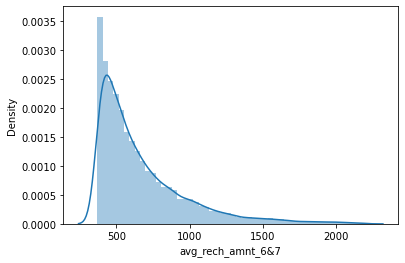

In [69]:
univariate(df2['avg_rech_amnt_6&7'])

count    20004.000000
mean       980.099072
std        718.222821
min          0.000000
25%        501.327500
50%        821.690000
75%       1277.410000
max       9710.935000
Name: avg_mou_action, dtype: float64


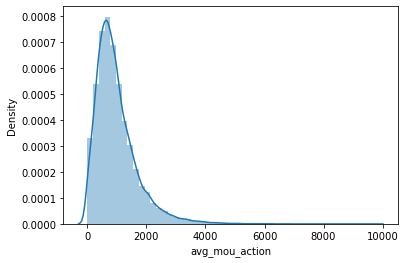

In [70]:
univariate(df2['avg_mou_action'])

count    20004.000000
mean        11.211708
std          8.857105
min          0.000000
25%          5.500000
50%          8.500000
75%         14.000000
max        130.000000
Name: avg_rech_num_action, dtype: float64


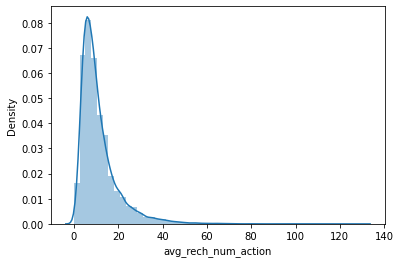

In [71]:
univariate(df2['avg_rech_num_action'])

count    20004.000000
mean       639.354029
std        361.076100
min          0.000000
25%        405.000000
50%        555.500000
75%        782.000000
max       4474.500000
Name: avg_rech_amt_action, dtype: float64


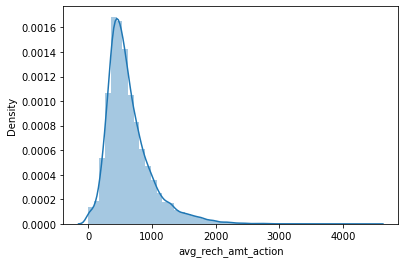

In [72]:
univariate(df2['avg_rech_amt_action'])

count    20004.000000
mean       549.253467
std        302.426005
min       -182.902500
25%        351.390500
50%        476.299750
75%        669.321125
max       3884.469000
Name: avg_arpu_action, dtype: float64


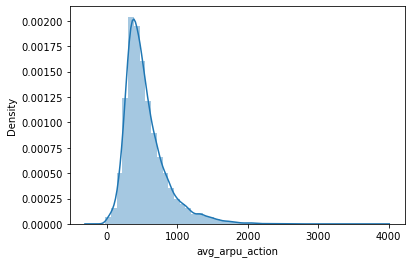

In [73]:
univariate(df2['avg_arpu_action'])

count    20004.000000
mean        55.778353
std        188.072225
min          0.000000
25%          0.000000
50%          0.000000
75%         27.737500
max       5407.845000
Name: avg_roam, dtype: float64


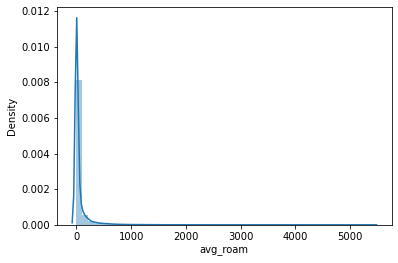

In [74]:
univariate(df2['avg_roam'])

##### 
The variables are skewed towards the right.

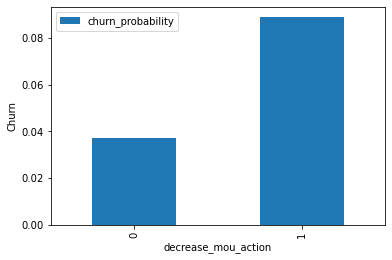

In [75]:
df2.pivot_table(values='churn_probability', index='decrease_mou_action', aggfunc = 'mean').plot.bar()
plt.ylabel('Churn')
plt.show()

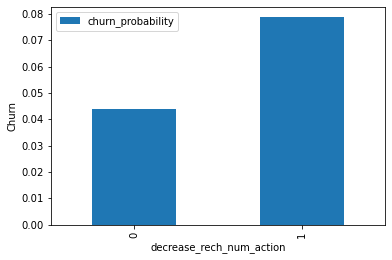

In [76]:
df2.pivot_table(values='churn_probability', index='decrease_rech_num_action', aggfunc = 'mean').plot.bar()
plt.ylabel('Churn')
plt.show()

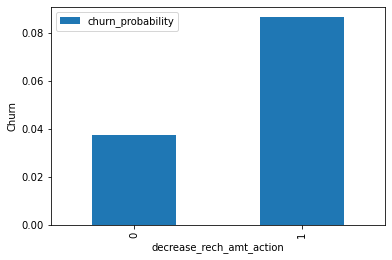

In [77]:
df2.pivot_table(values='churn_probability', index='decrease_rech_amt_action', aggfunc = 'mean').plot.bar()
plt.ylabel('Churn')
plt.show()

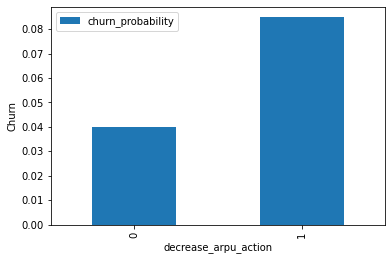

In [78]:
df2.pivot_table(values='churn_probability', index='decrease_arpu_action', aggfunc = 'mean').plot.bar()
plt.ylabel('Churn')
plt.show()

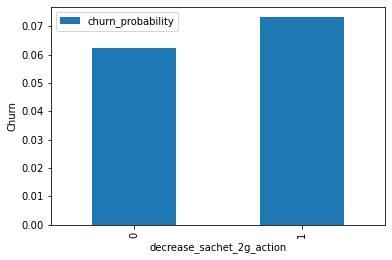

In [79]:
df2.pivot_table(values='churn_probability', index='decrease_sachet_2g_action', aggfunc = 'mean').plot.bar()
plt.ylabel('Churn')
plt.show()

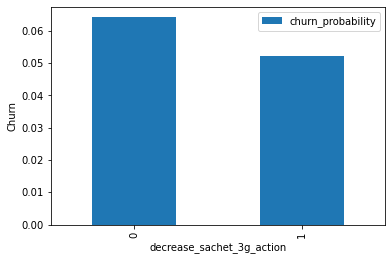

In [80]:
df2.pivot_table(values='churn_probability', index='decrease_sachet_3g_action', aggfunc = 'mean').plot.bar()
plt.ylabel('Churn')
plt.show()

Here we can see some difference. The churn rate is more for the customers whose 3g sachet in action month is increased

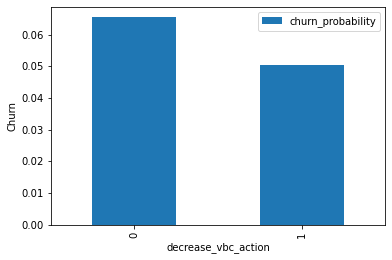

In [81]:
df2.pivot_table(values='churn_probability', index='decrease_vbc_action', aggfunc = 'mean').plot.bar()
plt.ylabel('Churn')
plt.show()

Here also the churn rate is more for the customers whose vbc in action month is increased

#### Bivariate Analysis:

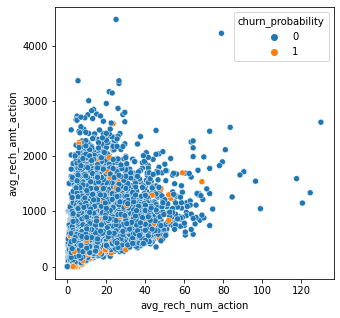

In [82]:
plt.figure(figsize=(5,5))
ax = sns.scatterplot('avg_rech_num_action','avg_rech_amt_action',hue='churn_probability',data=df2)

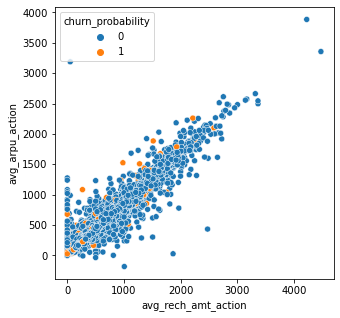

In [83]:
plt.figure(figsize=(5,5))
ax = sns.scatterplot('avg_rech_amt_action','avg_arpu_action',hue='churn_probability',data=df2)

###### Analysis:
From the above plot, it can be stated that the average revenue increases as the recharge amount increases. 
Thus, in order to increase the revenue of the company, customers' recharge amount should be high. 

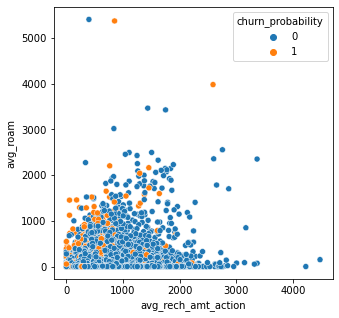

In [84]:
plt.figure(figsize=(5,5))
ax = sns.scatterplot('avg_rech_amt_action','avg_roam',hue='churn_probability',data=df2)

##### Analysis:
Here we can see that when the customers are on roaming package and have less recharge amount, tend to churn from the network.
This might happen because of high roaming cost of the company.

##### Dropping dreived features that are no longer required in our analysis:

In [85]:
df2.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'decrease_arpu_action', 'avg_sachet_2g_action',
       'decrease_sachet_2g_action', 'avg_sachet_3g_action',
       'decrease_sachet_3g_action', 'avg_vbc_action', 'decrease_vbc_action',
       'total_roam_ic', 'total_roam_og', 'avg_roam'],
      dtype='object', length=143)

In [86]:
df2 = df2.drop(['total_roam_ic', 'total_roam_og', 'avg_roam', 'avg_vbc_action','avg_sachet_3g_action','avg_sachet_2g_action','avg_arpu_action','avg_rech_amt_action','avg_rech_num_action','avg_mou_action','avg_rech_amnt_6&7'], axis=1)

### 8. Train - Test Split & Scaling

In [87]:
#importing required libraries
from sklearn.model_selection import train_test_split

In [88]:
X = df2.drop('churn_probability', axis=1)
y = df2['churn_probability']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state = 100)

In [90]:
X_train.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'decrease_mou_action',
       'decrease_rech_num_action', 'decrease_rech_amt_action',
       'decrease_arpu_action', 'decrease_sachet_2g_action',
       'decrease_sachet_3g_action', 'decrease_vbc_action'],
      dtype='object', length=131)

In [91]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [92]:
X_train[X_train.columns.to_list()] = scalar.fit_transform(X_train[X_train.columns.to_list()])

In [93]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_sachet_2g_action,decrease_sachet_3g_action,decrease_vbc_action
33228,-1.754590,1.350892,1.100073,-0.649565,0.592040,0.479077,-0.950241,2.029856,2.240527,0.023206,-0.097150,-0.112026,-0.141980,-0.178862,-0.082870,-0.405732,0.293838,0.279011,-0.763677,1.004477,0.714401,-0.332900,-0.319008,-0.197942,-0.217407,-0.226411,-0.160755,-0.773560,0.801860,0.623032,-0.487747,0.510592,0.398380,-0.520681,1.711991,2.138883,-0.156957,-0.148021,0.014747,-0.690749,1.528903,1.711568,-0.093244,0.002049,-0.065657,-0.329373,-0.317755,-0.068805,-0.317254,-0.018882,-0.019871,-1.116509,1.884910,1.889518,-0.436728,0.143538,-0.098282,-0.749142,0.225353,-0.210173,-0.351733,-0.324452,-0.314776,-0.800025,0.175964,-0.244830,-0.219152,1.178978,1.332566,-0.326189,0.545589,0.541841,-0.147196,0.412884,-0.152559,-0.379435,1.104312,1.092126,-0.874463,0.973909,0.797556,-0.316458,-0.1173,-0.251115,-0.170810,1.644936,2.775123,-0.071480,0.741800,0.349587,-1.098741,0.310374,-0.052296,-1.428486,1.475280,1.172281,-0.359910,-0.125659,-0.078415,0.081468,0.372287,0.430086,-0.279861,-0.277583,-0.254868,-0.315320,-0.336632,-0.319630,-0.337079,-0.345049,-0.323396,-0.295469,-0.305079,-0.333596,-0.300343,-0.30123,-0.302058,-0.154076,-0.155038,-0.142283,-0.922914,-0.331150,-0.334052,-0.312404,-1.021285,-1.149036,-1.076735,-1.055199,-0.342026,-0.227424,-0.374244
21130,0.251637,0.578678,0.041981,0.249188,-0.262508,-0.323785,0.034043,1.051503,0.582644,-0.223839,-0.176753,-0.176264,-0.255013,-0.230108,-0.215458,0.327734,-0.064937,-0.168083,-0.644064,1.011755,-0.530783,-0.332900,-0.341227,-0.337653,1.877523,0.285757,6.893387,-0.226993,0.558515,-0.463737,0.113019,-0.239212,-0.250106,0.378356,0.622872,0.822146,-0.156957,-0.148021,-0.156211,0.331750,0.266834,0.382275,-0.093244,-0.098064,-0.084468,2.534313,0.712394,3.322416,-0.317254,-0.018882,-0.019871,0.245285,0.595424,0.213662,0.126316,0.042955,-0.142742,-0.609460,0.220219,-0.524709,0.181020,-0.324452,-0.329872,-0.330445,0.116562,-0.486338,-0.219152,-0.108656,-0.208356,-0.322197,-0.263557,-0.300549,-0.147196,-0.162284,-0.152559,-0.376506,-0.264853,-0.347723,-0.464286,-0.050758,-0.587268,-0.

In [94]:
# Transform the test set
X_test[X_train.columns.to_list()] = scalar.transform(X_test[X_train.columns.to_list()])
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_sachet_2g_action,decrease_sachet_3g_action,decrease_vbc_action
58165,-1.674913,2.977313,3.016796,-0.670667,5.355365,4.739554,-0.908381,1.000342,1.781003,-0.146993,-0.163830,-0.176264,-0.060983,-0.112471,-0.215458,-0.405732,0.047745,0.155506,-0.763677,0.103454,0.293951,-0.332900,-0.341227,-0.337653,-0.217407,-0.226411,-0.245609,-0.773560,0.077250,0.268856,-0.487747,6.105840,5.303694,-0.520681,1.082267,1.910929,-0.156957,-0.148021,-0.156211,-0.690749,4.874214,4.866570,-0.093244,-0.098064,-0.084468,-0.329373,-0.333830,-0.309412,-0.317254,-0.018882,-0.019871,-1.116509,4.599029,4.555591,-0.436728,-0.353806,-0.353551,-0.749142,-0.639670,-0.464743,-0.351733,-0.324452,-0.256978,-0.800025,-0.682852,-0.548418,-0.219152,-0.193878,-0.211155,-0.326189,-0.297572,-0.046559,-0.147196,-0.108043,-0.152559,-0.379435,-0.330730,-0.166552,-0.874463,-0.754653,-0.569853,-0.316458,-0.1173,-0.251115,-0.170810,-0.168084,-0.160514,-0.07148,-0.082283,-0.082404,-1.207776,3.871561,4.277954,-1.807433,2.956357,2.987383,-1.067963,-0.320527,-0.078415,-0.815416,-0.409631,-0.500538,-0.279861,-0.277583,-0.254868,-0.315320,-0.336632,-0.319630,-0.337079,-0.345049,-0.323396,-0.295469,-0.305079,-0.333596,-0.300343,-0.301230,-0.302058,-0.154076,-0.155038,-0.142283,-0.541637,-0.331150,-0.334052,-0.312404,-1.021285,-1.149036,-1.076735,-1.055199,-0.342026,-0.227424,-0.374244
603,0.082367,-0.220196,0.206852,-0.068109,0.748266,0.837198,-0.207196,-0.816729,-0.509204,-0.207063,-0.163005,-0.176264,0.036756,0.121324,-0.215458,-0.360225,-0.381940,-0.338643,-0.698674,-0.715566,-0.718452,-0.332900,-0.341227,-0.337653,-0.217407,0.159896,-0.245609,-0.702298,-0.721783,-0.693537,0.140374,1.046449,1.164176,0.227438,-0.447273,-0.121140,-0.156957,-0.148021,-0.156211,0.247051,0.393760,0.701202,-0.093244,0.036840,-0.084468,-0.285030,-0.133337,0.215119,-0.317254,-0.018882,-0.019871,-0.202403,-0.051716,0.266384,-0.411336,-0.417616,-0.413013,-0.650735,-0.759149,-0.727455,-0.351733,-0.324452,-0.318874,-0.718426,-0.798754,-0.769714,-0.200207,-0.108883,-0.190764,-0.132735,-0.318562,-0.312381,-0.147196,-0.162284,-0.152559,-0.227286,-0.303091,-0.346713,

###  10. Model Building:

In [95]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.decomposition import PCA
#from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

### 11. PCA

In [96]:
X.shape

(20004, 131)

In [97]:
#instantiating PCA
pca = PCA(n_components=None)
X_pca = pca.fit(X_train)

In [98]:
#Cumulative variance of the PCA
variance_cumulative = np.cumsum(X_pca.explained_variance_ratio_ * 100)

Text(0, 0.5, 'Cumulative Variance')

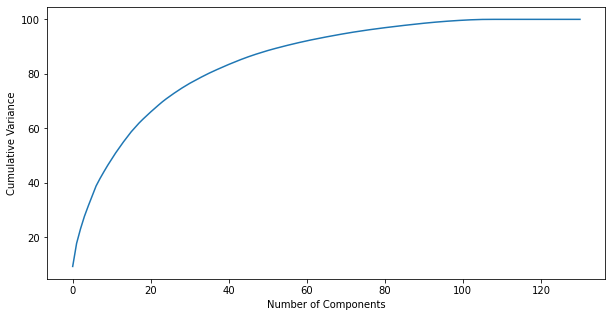

In [99]:
# Plotting scree plot
fig = plt.figure(figsize = (10,5))
plt.plot(variance_cumulative)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

In [100]:
print(pd.Series(np.round(X_pca.explained_variance_ratio_.cumsum(), 4)*100))

0        9.32
1       17.77
2       23.09
3       27.68
4       31.54
5       35.23
6       38.86
7       41.58
8       44.08
9       46.49
10      48.74
11      50.95
12      53.00
13      55.00
14      56.87
15      58.74
16      60.36
17      61.93
18      63.36
19      64.71
20      66.03
21      67.30
22      68.55
23      69.76
24      70.87
25      71.89
26      72.90
27      73.86
28      74.79
29      75.67
30      76.52
31      77.30
32      78.08
33      78.83
34      79.57
35      80.27
36      80.94
37      81.58
38      82.22
39      82.85
40      83.46
41      84.05
42      84.62
43      85.19
44      85.74
45      86.26
46      86.76
47      87.23
48      87.68
49      88.12
50      88.56
51      88.96
52      89.35
53      89.73
54      90.09
55      90.46
56      90.81
57      91.15
58      91.48
59      91.81
60      92.12
61      92.42
62      92.71
63      93.00
64      93.28
65      93.56
66      93.83
67      94.09
68      94.35
69      94.60
70      94.85
71    

Here we can see that 49 components explain around 88% of the variance.
We will be performing PCA again with 49 components.

In [101]:
from sklearn.decomposition import IncrementalPCA
pca = IncrementalPCA(n_components=49)
X_pca = pca.fit_transform(X_train)

# Get the transformed dataset
#X_pca = pd.DataFrame(X_pca)
#X_pca.head()

Building heat map of the transformed dataset

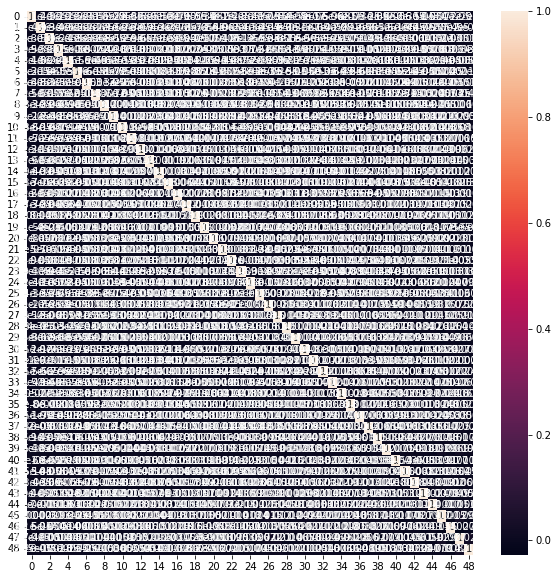

In [102]:
corr_mat = np.corrcoef(X_pca.transpose())
fig = plt.figure(figsize=(10, 10))
sns.heatmap(corr_mat, annot=True)
plt.show()

We cannot see any correlation between components. This is because PCA has transformed the set of correlated variables in the original dataset into a set of uncorrelated variables.

In [103]:
# Apply PCA model to the test data
pca_test = pca.transform(X_test)

#### PCA with Logistic regression:

In [104]:
from sklearn.model_selection import KFold

In [105]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_lr = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_lr.fit(X_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [106]:
# results of grid search CV
cv_results = pd.DataFrame(model_lr.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.218367,0.018436,0.011371,0.006091,0.01,{'C': 0.01},0.033333,0.054795,0.092784,0.052133,0.088757,0.064360,0.022833,6,0.075662,0.062500,0.071693,0.060606,0.068345,0.067761,0.005605
1,0.330059,0.019542,0.006251,0.007656,0.1,{'C': 0.1},0.042857,0.073059,0.113402,0.071090,0.100592,0.080200,0.024685,5,0.087011,0.085459,0.090235,0.079545,0.082734,0.084997,0.003648
2,0.417716,0.108916,0.009376,0.007655,1,{'C': 1},0.047619,0.073059,0.118557,0.071090,0.100592,0.082183,0.024750,1,0.088272,0.089286,0.091471,0.084596,0.083933,0.087512,0.002853
3,0.531234,0.071253,0.015623,0.000002,10,{'C': 10},0.047619,0.073059,0.113402,0.071090,0.100592,0.081152,0.023277,2,0.088272,0.089286,0.090235,0.084596,0.085132,0.087504,0.002250
4,0.537480,0.036440,0.003124,0.006248,100,{'C': 100},0.047619,0.073059,0.113402,0.071090,0.100592,0.081152,0.023277,2,0.088272,0.089286,0.090235,0.084596,0.085132,0.087504,0.002250
5,0.554115,0.056340,0.009375,0.007655,1000,{'C': 1000},0.047619,0.073059,0.113402,0.071090,0.100592,0.081152,0.023277,2,0.088272,0.089286,0.090235,0.084596,0.085132,0.087504,0.002250


In [107]:
# Best score with best C
best_score = model_lr.best_score_
best_C = model_lr.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.08218337455005306 at C = 1


In [108]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)
# Fit the model on the train set
lr_pca = logistic_pca.fit(X_pca, y_train)


In [109]:
# Predictions on the train set
y_train_pred = lr_pca.predict(X_pca)
# Confusion matrix
confusion = confusion_matrix(y_train, y_train_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",float(TP + TN) / float(TP+TN+FP+FN))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[14918    82]
 [  919    84]]
Accuracy:- 0.9374492282696995
Sensitivity:- 0.08374875373878365
Specificity:- 0.9945333333333334


In [110]:
# Predictions on the test set
y_test_pred = lr_pca.predict(pca_test)
# Confusion matrix
confusion = confusion_matrix(y_test, y_test_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",float(TP + TN) / float(TP+TN+FP+FN))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[3697   35]
 [ 244   25]]
Accuracy:- 0.9302674331417146
Sensitivity:- 0.09293680297397769
Specificity:- 0.9906216505894962


Logistic regression model is giving us better test sensitivity.

#### Random Forest with PCA:

In [111]:
from sklearn.ensemble import RandomForestClassifier 

In [112]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
model_rf = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
model_rf.fit(X_pca, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [113]:
# optimal accuracy score and hyperparameters
print('We can get accuracy of',model_rf.best_score_,'using',model_rf.best_params_)


We can get accuracy of 0.937511735587878 using {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 200}


In [114]:
# model with the best hyperparameters

rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=100)

In [115]:
# Fit the model
rfc_model.fit(X_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100)

In [116]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_pca)
# Confusion matrix
confusion = confusion_matrix(y_train, y_train_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",float(TP + TN) / float(TP+TN+FP+FN))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[14999     1]
 [  999     4]]
Accuracy:- 0.9375117165531462
Sensitivity:- 0.003988035892323031
Specificity:- 0.9999333333333333


In [117]:
# predict churn on test data
y_test_pred = model_rf.predict(pca_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives
# Accuracy
print("Accuracy:-",float(TP + TN) / float(TP+TN+FP+FN))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


[[3732    0]
 [ 269    0]]
Accuracy:- 0.9327668082979255
Sensitivity:- 0.0
Specificity:- 1.0


we can see that the Sensitivity score is very bad in random forest as compared to LR

### 14. Logistic Regression Model without PCA:
As We have seen earlier, the Sensitivity score was bad in Random forest and it was comparatively good in logistic regression model,so we will build our model using Logistic Regression.
Before that lets also see if the LR model shows any difference when used with RFE

In [118]:
import statsmodels.api as sm
# Adding the constant to X_train
lr = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())
# Fit the model
lr = lr.fit().summary()
# Summary
lr

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                16003
Model:                            GLM   Df Residuals:                    15871
Model Family:                Binomial   Df Model:                          131
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2623.1
Date:                Wed, 14 Sep 2022   Deviance:                       5246.2
Time:                        16:45:19   Pearson chi2:                 6.20e+04
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -4.2213      0.118    -35.871      0.000      -4.452      -3.991
arpu_6                        0.0683      0.131      0.522      0.602      -0.188       0.325
arpu_7                        0.4474      0.140      3.191      0.001       0.173       0.722
arpu_8                        0.7197      0.169      4.262      0.000       0.389       1.051
onnet_mou_6                   3.7716      5.224      0.722      0.470      -6.467      14.010
onnet_mou_7                   1.2360      3.225      0.383      0.701      -5.084       7.556
onnet_mou_8                  -3.1892      2.922     -1.091      0.275      -8.917       2.539
offnet_mou_6                  4.6565      5.212      0.893      0.372      -5.558      14.871
offnet_mou_7                  1.0636      3.094      0.344      0.731      -5.001       7.129
offnet_mou_8                 -3.5673      2.860     -1.247      0.212      -9.174       2.039
roam_ic_mou_6                 0.0520      0.040      1.307      0.191      -0.026       0.130
roam_ic_mou_7                 0.0153      0.044      0.345      0.730      -0.072       0.102
roam_ic_mou_8                -0.0182      0.038     -0.484      0.628      -0.092       0.056
roam_og_mou_6                -1.0303      1.336     -0.771      0.441      -3.649       1.588
roam_og_mou_7                -0.1055      0.606     -0.174      0.862      -1.293       1.082
roam_og_mou_8                 0.7658      0.613      1.249      0.212      -0.436       1.968
loc_og_t2t_mou_6           -926.0919   1595.665     -0.580      0.562   -4053.538    2201.354
loc_og_t2t_mou_7           -782.2261   1731.329     -0.452      0.651   -4175.569    2611.117
loc_og_t2t_mou_8           5240.2087   1700.138      3.082      0.002    1907.999    8572.418
loc_og_t2m_mou_6           -939.3075   1617.316     -0.581      0.561   -4109.189    2230.574
loc_og_t2m_mou_7           -700.0101   1549.642     -0.452      0.651   -3737.252    2337.232
loc_og_t2m_mou_8           5098.6206   1654.203      3.082      0.002    1856.441    8340.800
loc_og_t2f_mou_6            -83.0798    143.110     -0.581      0.562    -363.570     197.410
loc_og_t2f_mou_7            -64.0311    141.527     -0.452      0.651    -341.419     213.357
loc_og_t2f_mou_8            438.4940    142.224      3.083      0.002     159.741     717.247
loc_og_t2c_mou_6             -0.0067      0.036     -0.186      0.852      -0.077       0.063
loc_og_t2c_mou_7              0.0648      0.043      1.502      0.133      -0.020       0.149
loc_og_t2c_mou_8              0.0044      0.049      0.090      0.928      -0.092       0.101
loc_og_mou_6              -2496.2118   3020.786     -0.826      0.409   -8416.844    3424.420
loc_og_mou_7                616.1805   3228.836      0.191      0.849   -57

#### Analysis
Many features have higher p-values and hence became insignificant in the model.

### RFE 
We will use RFE for feature selection

In [119]:
lgr = LogisticRegression()

RFE with 20 columns

In [120]:
# Importing RFE
from sklearn.feature_selection import RFE

# Intantiate RFE with 20 columns
rfe = RFE(lgr, n_features_to_select = 20)

In [121]:
# Fit the rfe model with train set
rfe = rfe.fit(X_train, y_train)

In [122]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['arpu_7', 'offnet_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_8',
       'std_og_t2m_mou_6', 'og_others_7', 'og_others_8', 'total_og_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'total_ic_mou_7', 'total_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'vol_3g_mb_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aon'],
      dtype='object')


#### first model with RFE selected columns

In [123]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
lr_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
lr_1 = lr_1.fit()

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                16003
Model:                            GLM   Df Residuals:                    15982
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2782.8
Date:                Wed, 14 Sep 2022   Deviance:                       5565.5
Time:                        16:47:17   Pearson chi2:                 2.48e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.2626      0.115    -36.940      0.000      -4.489      -4.036
arpu_7                 0.3307      0.040      8.269      0.000       0.252       0.409
offnet_mou_6           0.7771      0.158      4.917      0.000       0.467       1.087
loc_og_t2m_mou_6      -0.4229      0.101     -4.170      0.000      -0.622      -0.224
loc_og_t2m_mou_8      -0.6398      0.137     -4.683      0.000      -0.908      -0.372
std_og_t2m_mou_6      -0.5639      0.143     -3.956      0.000      -0.843      -0.284
og_others_7           -1.8270      2.405     -0.760      0.448      -6.541       2.887
og_others_8           -2.2818      3.409     -0.669      0.503      -8.962       4.399
total_og_mou_8        -0.4947      0.066     -7.486      0.000      -0.624      -0.365
loc_ic_t2f_mou_8      -0.2274      0.158     -1.441      0.150      -0.537       0.082
loc_ic_mou_8          -0.7114      0.248     -2.870      0.004      -1.197      -0.226
total_ic_mou_7         0.5500      0.077      7.160      0.000       0.399       0.701
total_ic_mou_8        -1.2695      0.221     -5.741      0.000      -1.703      -0.836
spl_ic_mou_8          -0.5019      0.087     -5.738      0.000      -0.673      -0.330
total_rech_num_8      -0.2995      0.059     -5.108      0.000      -0.414      -0.185
last_day_rch_amt_8    -0.5025      0.072     -6.952      0.000      -0.644      -0.361
vol_3g_mb_8           -0.3959      0.131     -3.015      0.003      -0.653      -0.139
monthly_2g_8          -0.5443      0.092     -5.939      0.000      -0.724      -0.365
sachet_2g_8           -0.2932      0.071     -4.105      0.000      -0.433      -0.153
monthly_3g_8          -0.2672      0.103     -2.591      0.010      -0.469      -0.065
aon                   -0.2153      0.047     -4.566      0.000      -0.308      -0.123
======================================================================================
"""

#### Vif for first model

In [124]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,offnet_mou_6,31.58
4,std_og_t2m_mou_6,25.87
2,loc_og_t2m_mou_6,10.75
11,total_ic_mou_8,7.07
9,loc_ic_mou_8,5.43
10,total_ic_mou_7,3.19
3,loc_og_t2m_mou_8,2.34
15,vol_3g_mb_8,1.88
18,monthly_3g_8,1.83
7,total_og_mou_8,1.75


Removing og_others_8 as it has highesh P value

In [125]:
# Removing og_others_8 column 
lgr_cols = rfe_cols.to_list()
lgr_cols.remove('og_others_8')
print(lgr_cols)

['arpu_7', 'offnet_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_8', 'std_og_t2m_mou_6', 'og_others_7', 'total_og_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'vol_3g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aon']


#### Second Model with lgr_cols

In [126]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[lgr_cols])

#Instantiate the model
lr_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
lr_2 = lr_2.fit()

lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                16003
Model:                            GLM   Df Residuals:                    15983
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2783.4
Date:                Wed, 14 Sep 2022   Deviance:                       5566.7
Time:                        16:47:21   Pearson chi2:                 2.49e+05
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.2250      0.096    -44.214      0.000      -4.412      -4.038
arpu_7                 0.3305      0.040      8.263      0.000       0.252       0.409
offnet_mou_6           0.7775      0.158      4.919      0.000       0.468       1.087
loc_og_t2m_mou_6      -0.4233      0.101     -4.174      0.000      -0.622      -0.225
loc_og_t2m_mou_8      -0.6390      0.137     -4.678      0.000      -0.907      -0.371
std_og_t2m_mou_6      -0.5639      0.143     -3.956      0.000      -0.843      -0.285
og_others_7           -2.1242      2.335     -0.910      0.363      -6.700       2.452
total_og_mou_8        -0.4958      0.066     -7.503      0.000      -0.625      -0.366
loc_ic_t2f_mou_8      -0.2266      0.158     -1.437      0.151      -0.536       0.082
loc_ic_mou_8          -0.7112      0.248     -2.868      0.004      -1.197      -0.225
total_ic_mou_7         0.5509      0.077      7.169      0.000       0.400       0.702
total_ic_mou_8        -1.2711      0.221     -5.745      0.000      -1.705      -0.837
spl_ic_mou_8          -0.5019      0.087     -5.739      0.000      -0.673      -0.330
total_rech_num_8      -0.3002      0.059     -5.117      0.000      -0.415      -0.185
last_day_rch_amt_8    -0.5022      0.072     -6.949      0.000      -0.644      -0.361
vol_3g_mb_8           -0.3961      0.131     -3.016      0.003      -0.654      -0.139
monthly_2g_8          -0.5440      0.092     -5.936      0.000      -0.724      -0.364
sachet_2g_8           -0.2929      0.071     -4.100      0.000      -0.433      -0.153
monthly_3g_8          -0.2670      0.103     -2.589      0.010      -0.469      -0.065
aon                   -0.2168      0.047     -4.602      0.000      -0.309      -0.124
======================================================================================
"""

### Vif of 2nd model:

In [127]:
vif = pd.DataFrame()
vif['Features'] = X_train[lgr_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[lgr_cols].values, i) for i in range(X_train[lgr_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,offnet_mou_6,31.58
4,std_og_t2m_mou_6,25.87
2,loc_og_t2m_mou_6,10.75
10,total_ic_mou_8,7.07
8,loc_ic_mou_8,5.43
9,total_ic_mou_7,3.19
3,loc_og_t2m_mou_8,2.34
14,vol_3g_mb_8,1.88
17,monthly_3g_8,1.83
6,total_og_mou_8,1.75


As we can see from the model summary that all the variables p-values are significant and offnet_mou_6 column has the highest VIF 31.58. Hence, deleting offnet_mou_6 column.

In [128]:
# Removing offnet_mou_8 column
lgr_cols.remove('offnet_mou_6')

#### Third model:

In [129]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[lgr_cols])

#Instantiate the model
lr_3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
lr_3 = lr_3.fit()

lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                16003
Model:                            GLM   Df Residuals:                    15984
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2795.0
Date:                Wed, 14 Sep 2022   Deviance:                       5589.9
Time:                        16:47:25   Pearson chi2:                 2.48e+05
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.2188      0.095    -44.184      0.000      -4.406      -4.032
arpu_7                 0.3546      0.040      8.923      0.000       0.277       0.433
loc_og_t2m_mou_6      -0.0095      0.058     -0.165      0.869      -0.122       0.103
loc_og_t2m_mou_8      -0.6288      0.137     -4.594      0.000      -0.897      -0.361
std_og_t2m_mou_6       0.1228      0.030      4.154      0.000       0.065       0.181
og_others_7           -2.1130      2.331     -0.906      0.365      -6.682       2.456
total_og_mou_8        -0.5188      0.066     -7.835      0.000      -0.649      -0.389
loc_ic_t2f_mou_8      -0.2109      0.159     -1.326      0.185      -0.523       0.101
loc_ic_mou_8          -0.7632      0.246     -3.108      0.002      -1.244      -0.282
total_ic_mou_7         0.5372      0.077      6.985      0.000       0.386       0.688
total_ic_mou_8        -1.2271      0.218     -5.622      0.000      -1.655      -0.799
spl_ic_mou_8          -0.4970      0.087     -5.704      0.000      -0.668      -0.326
total_rech_num_8      -0.3004      0.059     -5.133      0.000      -0.415      -0.186
last_day_rch_amt_8    -0.4798      0.071     -6.718      0.000      -0.620      -0.340
vol_3g_mb_8           -0.4136      0.131     -3.145      0.002      -0.671      -0.156
monthly_2g_8          -0.5319      0.090     -5.894      0.000      -0.709      -0.355
sachet_2g_8           -0.2939      0.071     -4.113      0.000      -0.434      -0.154
monthly_3g_8          -0.2629      0.103     -2.555      0.011      -0.465      -0.061
aon                   -0.2106      0.047     -4.481      0.000      -0.303      -0.119
======================================================================================
"""

#### VIF for 3rd Model:

In [130]:
vif = pd.DataFrame()
vif['Features'] = X_train[lgr_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[lgr_cols].values, i) for i in range(X_train[lgr_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,total_ic_mou_8,7.05
7,loc_ic_mou_8,5.41
8,total_ic_mou_7,3.19
2,loc_og_t2m_mou_8,2.33
1,loc_og_t2m_mou_6,1.95
13,vol_3g_mb_8,1.88
16,monthly_3g_8,1.83
5,total_og_mou_8,1.75
0,arpu_7,1.49
11,total_rech_num_8,1.47


In [131]:
# Removing total_ic_mou_8 column
lgr_cols.remove('total_ic_mou_8')

#### Model 4:

In [132]:
# Adding constant to X_train
X_train_sm_4 = sm.add_constant(X_train[lgr_cols])

#Instantiate the model
lr_4 = sm.GLM(y_train, X_train_sm_4, family=sm.families.Binomial())

# Fit the model
lr_4 = lr_4.fit()

lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                16003
Model:                            GLM   Df Residuals:                    15985
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2820.5
Date:                Wed, 14 Sep 2022   Deviance:                       5641.0
Time:                        16:47:28   Pearson chi2:                 4.01e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.2082      0.096    -43.862      0.000      -4.396      -4.020
arpu_7                 0.3883      0.039     10.011      0.000       0.312       0.464
loc_og_t2m_mou_6       0.0498      0.054      0.918      0.359      -0.057       0.156
loc_og_t2m_mou_8      -0.6624      0.137     -4.829      0.000      -0.931      -0.394
std_og_t2m_mou_6       0.1222      0.030      4.134      0.000       0.064       0.180
og_others_7           -1.9141      2.329     -0.822      0.411      -6.479       2.651
total_og_mou_8        -0.5985      0.066     -9.013      0.000      -0.729      -0.468
loc_ic_t2f_mou_8      -0.2630      0.165     -1.595      0.111      -0.586       0.060
loc_ic_mou_8          -1.6023      0.173     -9.240      0.000      -1.942      -1.262
total_ic_mou_7         0.2020      0.050      4.054      0.000       0.104       0.300
spl_ic_mou_8          -0.5139      0.088     -5.856      0.000      -0.686      -0.342
total_rech_num_8      -0.3300      0.059     -5.624      0.000      -0.445      -0.215
last_day_rch_amt_8    -0.5157      0.071     -7.278      0.000      -0.655      -0.377
vol_3g_mb_8           -0.4267      0.132     -3.229      0.001      -0.686      -0.168
monthly_2g_8          -0.5450      0.090     -6.053      0.000      -0.721      -0.368
sachet_2g_8           -0.3008      0.072     -4.198      0.000      -0.441      -0.160
monthly_3g_8          -0.2951      0.103     -2.863      0.004      -0.497      -0.093
aon                   -0.2140      0.047     -4.577      0.000      -0.306      -0.122
======================================================================================
"""

#### VIF for Model 4:

In [133]:
vif = pd.DataFrame()
vif['Features'] = X_train[lgr_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[lgr_cols].values, i) for i in range(X_train[lgr_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,loc_ic_mou_8,2.60
2,loc_og_t2m_mou_8,2.33
8,total_ic_mou_7,2.26
1,loc_og_t2m_mou_6,1.92
12,vol_3g_mb_8,1.88
15,monthly_3g_8,1.83
5,total_og_mou_8,1.72
0,arpu_7,1.49
10,total_rech_num_8,1.47
3,std_og_t2m_mou_6,1.23


In [134]:
# Removing loc_og_t2m_mou_6 column
lgr_cols.remove('loc_og_t2m_mou_6')


#### Model 5:

In [135]:
# Adding constant to X_train
X_train_sm_5 = sm.add_constant(X_train[lgr_cols])

#Instantiate the model
lr_5 = sm.GLM(y_train, X_train_sm_5, family=sm.families.Binomial())

# Fit the model
lr_5 = lr_5.fit()

lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                16003
Model:                            GLM   Df Residuals:                    15986
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2820.9
Date:                Wed, 14 Sep 2022   Deviance:                       5641.9
Time:                        16:47:31   Pearson chi2:                 3.88e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.2053      0.096    -43.887      0.000      -4.393      -4.017
arpu_7                 0.3897      0.039     10.052      0.000       0.314       0.466
loc_og_t2m_mou_8      -0.6176      0.128     -4.831      0.000      -0.868      -0.367
std_og_t2m_mou_6       0.1229      0.030      4.157      0.000       0.065       0.181
og_others_7           -1.9138      2.331     -0.821      0.412      -6.482       2.655
total_og_mou_8        -0.6075      0.066     -9.229      0.000      -0.737      -0.478
loc_ic_t2f_mou_8      -0.2593      0.165     -1.576      0.115      -0.582       0.063
loc_ic_mou_8          -1.6025      0.173     -9.240      0.000      -1.942      -1.263
total_ic_mou_7         0.2061      0.050      4.156      0.000       0.109       0.303
spl_ic_mou_8          -0.5146      0.088     -5.862      0.000      -0.687      -0.343
total_rech_num_8      -0.3331      0.059     -5.678      0.000      -0.448      -0.218
last_day_rch_amt_8    -0.5182      0.071     -7.319      0.000      -0.657      -0.379
vol_3g_mb_8           -0.4292      0.132     -3.245      0.001      -0.688      -0.170
monthly_2g_8          -0.5460      0.090     -6.064      0.000      -0.722      -0.369
sachet_2g_8           -0.2997      0.072     -4.185      0.000      -0.440      -0.159
monthly_3g_8          -0.2966      0.103     -2.877      0.004      -0.499      -0.095
aon                   -0.2142      0.047     -4.582      0.000      -0.306      -0.123
======================================================================================
"""

#### VIF for Model 5:

In [136]:
vif = pd.DataFrame()
vif['Features'] = X_train[lgr_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[lgr_cols].values, i) for i in range(X_train[lgr_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,loc_ic_mou_8,2.60
7,total_ic_mou_7,2.25
11,vol_3g_mb_8,1.88
14,monthly_3g_8,1.82
4,total_og_mou_8,1.70
0,arpu_7,1.48
1,loc_og_t2m_mou_8,1.47
9,total_rech_num_8,1.46
2,std_og_t2m_mou_6,1.23
10,last_day_rch_amt_8,1.20


In [137]:
# Removing loc_ic_mou_8 column
lgr_cols.remove('loc_ic_mou_8')


#### Model 6:

In [138]:
# Adding constant to X_train
X_train_sm_6 = sm.add_constant(X_train[lgr_cols])

#Instantiate the model
lr_6 = sm.GLM(y_train, X_train_sm_6, family=sm.families.Binomial())

# Fit the model
lr_6 = lr_6.fit()

lr_6.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                16003
Model:                            GLM   Df Residuals:                    15987
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2880.9
Date:                Wed, 14 Sep 2022   Deviance:                       5761.8
Time:                        16:47:33   Pearson chi2:                 6.52e+05
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.0778      0.092    -44.222      0.000      -4.259      -3.897
arpu_7                 0.4340      0.038     11.300      0.000       0.359       0.509
loc_og_t2m_mou_8      -1.3324      0.122    -10.892      0.000      -1.572      -1.093
std_og_t2m_mou_6       0.1495      0.029      5.088      0.000       0.092       0.207
og_others_7           -1.7405      2.274     -0.765      0.444      -6.197       2.716
total_og_mou_8        -0.6713      0.066    -10.164      0.000      -0.801      -0.542
loc_ic_t2f_mou_8      -0.8104      0.172     -4.713      0.000      -1.147      -0.473
total_ic_mou_7        -0.0710      0.049     -1.453      0.146      -0.167       0.025
spl_ic_mou_8          -0.5297      0.088     -5.998      0.000      -0.703      -0.357
total_rech_num_8      -0.3792      0.059     -6.431      0.000      -0.495      -0.264
last_day_rch_amt_8    -0.5364      0.072     -7.494      0.000      -0.677      -0.396
vol_3g_mb_8           -0.4763      0.136     -3.510      0.000      -0.742      -0.210
monthly_2g_8          -0.5636      0.090     -6.256      0.000      -0.740      -0.387
sachet_2g_8           -0.3169      0.072     -4.382      0.000      -0.459      -0.175
monthly_3g_8          -0.2848      0.103     -2.760      0.006      -0.487      -0.083
aon                   -0.2457      0.047     -5.280      0.000      -0.337      -0.154
======================================================================================
"""

In [139]:
coeff= lr_6.params
coeff

const                -4.077798
arpu_7                0.433963
loc_og_t2m_mou_8     -1.332358
std_og_t2m_mou_6      0.149546
og_others_7          -1.740547
total_og_mou_8       -0.671323
loc_ic_t2f_mou_8     -0.810424
total_ic_mou_7       -0.070954
spl_ic_mou_8         -0.529682
total_rech_num_8     -0.379232
last_day_rch_amt_8   -0.536387
vol_3g_mb_8          -0.476253
monthly_2g_8         -0.563605
sachet_2g_8          -0.316947
monthly_3g_8         -0.284800
aon                  -0.245656
dtype: float64

#### VIF for Model 6:

In [140]:
vif = pd.DataFrame()
vif['Features'] = X_train[lgr_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[lgr_cols].values, i) for i in range(X_train[lgr_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,vol_3g_mb_8,1.88
13,monthly_3g_8,1.82
4,total_og_mou_8,1.70
0,arpu_7,1.46
8,total_rech_num_8,1.46
1,loc_og_t2m_mou_8,1.35
2,std_og_t2m_mou_6,1.23
6,total_ic_mou_7,1.22
9,last_day_rch_amt_8,1.20
12,sachet_2g_8,1.13


#### We will use the sixth model for our prediction as all the features are significant

In [141]:
# prediction on the train set
y_train_pred_final = lr_6.predict(X_train_sm_6)
y_train_pred_final.head()

33228    0.007423
21130    0.028095
11155    0.000682
56380    0.024455
44670    0.001738
dtype: float64

In [142]:
y_train_pred_final = pd.DataFrame({'ID':y_train_pred_final.index,'churn':y_train.values, 'churn_prob':y_train_pred_final.values})
y_train_pred_final.head()

,ID,churn,churn_prob
0,33228,0,0.007423
1,21130,0,0.028095
2,11155,0,0.000682
3,56380,0,0.024455
4,44670,0,0.001738


In [143]:
# Create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.churn_prob.map(lambda x: 1 if x > i else 0)

In [144]:
y_train_pred_final.head()

,ID,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,33228,0,0.007423,1,0,0,0,0,0,0,0,0,0
1,21130,0,0.028095,1,0,0,0,0,0,0,0,0,0
2,11155,0,0.000682,1,0,0,0,0,0,0,0,0,0
3,56380,0,0.024455,1,0,0,0,0,0,0,0,0,0
4,44670,0,0.001738,1,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='Probability'>

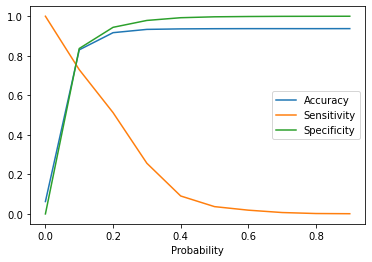

In [145]:
# Calculate accuracy, sensitivity & specificity for different cut off points
Probability = pd.DataFrame( columns = ['Probability', 'Accuracy', 'Sensitivity', 'Specificity'])
for i in numbers:
    CM = confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    Total = sum(sum(CM))
    Accuracy    = (CM[0,0]+CM[1,1])/Total
    Sensitivity = CM[1,1]/(CM[1,1]+CM[1,0])
    Specificity = CM[0,0]/(CM[0,0]+CM[0,1])
    Probability.loc[i] =[ i, Accuracy, Sensitivity, Specificity]
Probability.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])

In [146]:
y_train_pred_final['predicted'] = y_train_pred_final.churn_prob.map( lambda x: 1 if x > 0.3 else 0)

In [147]:
Probability

,Probability,Accuracy,Sensitivity,Specificity
0.0,0.0,0.062676,1.000000,0.000000
0.1,0.1,0.830032,0.729811,0.836733
0.2,0.2,0.916891,0.512463,0.943933
0.3,0.3,0.933512,0.256231,0.978800
0.4,0.4,0.936012,0.090728,0.992533
0.5,0.5,0.936949,0.036889,0.997133
0.6,0.6,0.937262,0.018943,0.998667
0.7,0.7,0.937262,0.006979,0.999467
0.8,0.8,0.937199,0.001994,0.999733
0.9,0.9,0.937387,0.000997,1.000000


In [148]:
y_train_pred_final

,ID,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,33228,0,0.007423,1,0,0,0,0,0,0,0,0,0,0
1,21130,0,0.028095,1,0,0,0,0,0,0,0,0,0,0
2,11155,0,0.000682,1,0,0,0,0,0,0,0,0,0,0
3,56380,0,0.024455,1,0,0,0,0,0,0,0,0,0,0
4,44670,0,0.001738,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15998,56965,0,0.014593,1,0,0,0,0,0,0,0,0,0,0
15999,276,0,0.014591,1,0,0,0,0,0,0,0,0,0,0
16000,42460,1,0.090497,1,0,0,0,0,0,0,0,0,0,0
16001,49491,1,0.044460,1,0,0,0,0,0,0,0,0,0,0


In [149]:
# create onfusion matrix
cm = confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(cm)
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives
# Accuracy
print("Accuracy:-",float(TP + TN) / float(TP+TN+FP+FN))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[14682   318]
 [  746   257]]
Accuracy:- 0.9335124664125476
Sensitivity:- 0.25623130608175476
Specificity:- 0.9788


In [177]:
#reading unseen test dataset
test_new=pd.read_csv('test.csv')
test_new.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [178]:
test_new_df = test_new.copy()

In [179]:
test_id = test_new.id

In [180]:
test_new_df = test_new_df[lgr_cols]

In [181]:
test_new_df.head()

,arpu_7,loc_og_t2m_mou_8,std_og_t2m_mou_6,og_others_7,total_og_mou_8,loc_ic_t2f_mou_8,total_ic_mou_7,spl_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,aon
0,65.330,8.36,42.03,0.0,57.94,0.00,43.56,0.39,4,0,0.0,0,0,0,1692
1,515.568,377.26,0.00,0.0,415.59,0.00,339.64,0.00,5,0,0.0,0,0,0,2533
2,434.884,0.00,0.00,0.0,0.00,0.00,0.00,0.00,5,0,0.0,0,0,0,277
3,171.390,20.51,37.09,0.0,24.01,1.64,522.44,0.00,2,0,0.0,0,0,0,1244
4,406.289,10.94,58.54,0.0,779.78,0.00,115.93,0.00,8,130,0.0,0,0,0,462


In [182]:
# Adding constant on the test set
test_new_sm = sm.add_constant(test_new_df)

In [183]:
test_pred = lr_6.predict(test_new_sm)
test_pred.head()

0    8.629843e-192
1     0.000000e+00
2     1.000000e+00
3    2.223295e-136
4    2.910425e-240
dtype: float64

In [184]:
test_pred_1 = pd.DataFrame(test_pred)
test_pred_1.head()

,0
0,8.629843e-192
1,0.000000e+00
2,1.000000e+00
3,2.223295e-136
4,2.910425e-240


In [185]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn_probability
58165,0
603,0
28696,0
34825,0
17757,0


In [186]:
# Removing index form the both dataframes for merging them side by side
test_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [187]:
y_test_pred_final = pd.concat([test_id,y_test_df,test_pred_1],axis=1)

In [188]:
y_test_pred_final.head()

,id,churn_probability,0
0,69999,0.0,8.629843e-192
1,70000,0.0,0.000000e+00
2,70001,0.0,1.000000e+00
3,70002,0.0,2.223295e-136
4,70003,0.0,2.910425e-240


In [189]:
y_test_pred_final = y_test_pred_final.rename(columns={'churn_probability':'churn',0:'churn_prob'})

In [190]:
y_test_pred_final.head()

,id,churn,churn_prob
0,69999,0.0,8.629843e-192
1,70000,0.0,0.000000e+00
2,70001,0.0,1.000000e+00
3,70002,0.0,2.223295e-136
4,70003,0.0,2.910425e-240


In [191]:
# In the test set using probablity cutoff 0.5, what we got in the train set 
y_test_pred_final['churn_probability'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

,id,churn,churn_prob,churn_probability
0,69999,0.0,8.629843e-192,0
1,70000,0.0,0.000000e+00,0
2,70001,0.0,1.000000e+00,1
3,70002,0.0,2.223295e-136,0
4,70003,0.0,2.910425e-240,0


In [192]:
y_test_pred_final.shape

(30000, 4)

#### Importing the test prediction dataframe in the solution.csv file:

In [193]:
y_test_pred_final.to_csv("solution.csv",index=False, columns = ['id','churn_probability'] )

#### Deriving important features:

In [167]:
coeff

const                -4.077798
arpu_7                0.433963
loc_og_t2m_mou_8     -1.332358
std_og_t2m_mou_6      0.149546
og_others_7          -1.740547
total_og_mou_8       -0.671323
loc_ic_t2f_mou_8     -0.810424
total_ic_mou_7       -0.070954
spl_ic_mou_8         -0.529682
total_rech_num_8     -0.379232
last_day_rch_amt_8   -0.536387
vol_3g_mb_8          -0.476253
monthly_2g_8         -0.563605
sachet_2g_8          -0.316947
monthly_3g_8         -0.284800
aon                  -0.245656
dtype: float64

In [168]:
coef_df = pd.DataFrame(coeff)
coef_df

,0
const,-4.077798
arpu_7,0.433963
loc_og_t2m_mou_8,-1.332358
std_og_t2m_mou_6,0.149546
og_others_7,-1.740547
total_og_mou_8,-0.671323
loc_ic_t2f_mou_8,-0.810424
total_ic_mou_7,-0.070954
spl_ic_mou_8,-0.529682
total_rech_num_8,-0.379232


In [169]:
coef_df['Features'] = coef_df.index

In [170]:
coef_df.reset_index(drop=True, inplace = True)
coef_df

,0,Features
0,-4.077798,const
1,0.433963,arpu_7
2,-1.332358,loc_og_t2m_mou_8
3,0.149546,std_og_t2m_mou_6
4,-1.740547,og_others_7
5,-0.671323,total_og_mou_8
6,-0.810424,loc_ic_t2f_mou_8
7,-0.070954,total_ic_mou_7
8,-0.529682,spl_ic_mou_8
9,-0.379232,total_rech_num_8


In [171]:
coef_df = coef_df.rename(columns = {0:'Coefficients'})

In [172]:
coef_df

,Coefficients,Features
0,-4.077798,const
1,0.433963,arpu_7
2,-1.332358,loc_og_t2m_mou_8
3,0.149546,std_og_t2m_mou_6
4,-1.740547,og_others_7
5,-0.671323,total_og_mou_8
6,-0.810424,loc_ic_t2f_mou_8
7,-0.070954,total_ic_mou_7
8,-0.529682,spl_ic_mou_8
9,-0.379232,total_rech_num_8


### Business Insights & Recommendations:
- Telecom company needs to pay attention on std and local T2M outgoing call prices , they should reduce the std out going charges to prevent customers to churn.
- from the features selected, we can clearly see that the top variables have negative coefficients.i.e. the features are inversely correlated with churn probability.
- Target the customers, whose outgoing others charge in July are less.
- The customers whose recharge amount in the month of august are less, are more likely to churn.
- Customers whose MOU in month of july is less, can churn the network.
- Customers whose 2g and 3g recharge in the month of august is less, are likely to churn.
- Customers whose Mobile internet usage volume in august is less, can churn
- The customers who have recently started using this operator, are likely to churn the network if they find other operator more attractive.

#### Plots of important predictors for churn and non churn customers:

In [173]:
# Creating churn dataframe
data_churn = df2[df2['churn_probability'] == 1]
# Creating not churn dataframe
data_non_churn = df2[df2['churn_probability'] == 0]


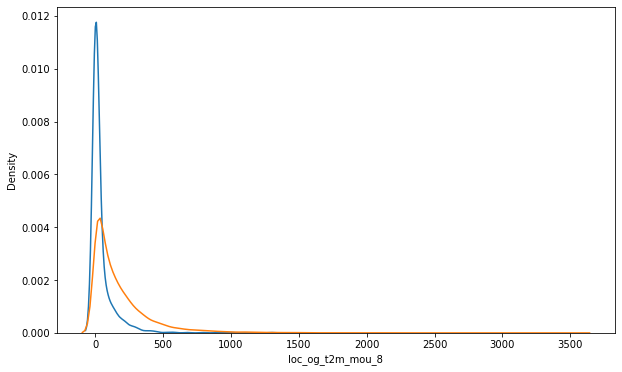

In [174]:
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['loc_og_t2m_mou_8'],label='churn',hist=False)
sns.distplot(data_non_churn['loc_og_t2m_mou_8'],label='not churn',hist=False)
plt.show()

We can see that for the churn customers the minutes of usage for the month of August is mostly populated on the lower side than the non churn customers.

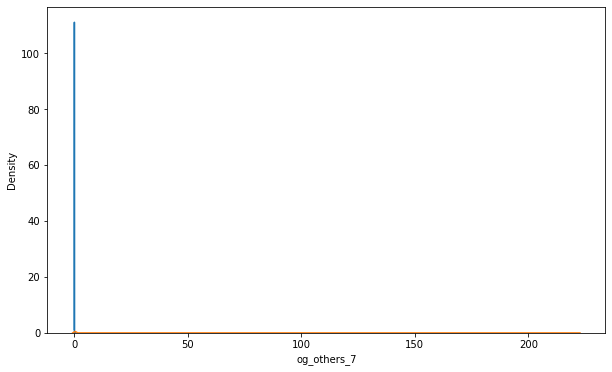

In [175]:
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['og_others_7'],label='churn',hist=False)
sns.distplot(data_non_churn['og_others_7'],label='not churn',hist=False)
plt.show()

We can see that the outgoing others for the month of july for churn customers is densed approximately to zero. On the onther hand for the non churn customers it is little more than the churn customers.

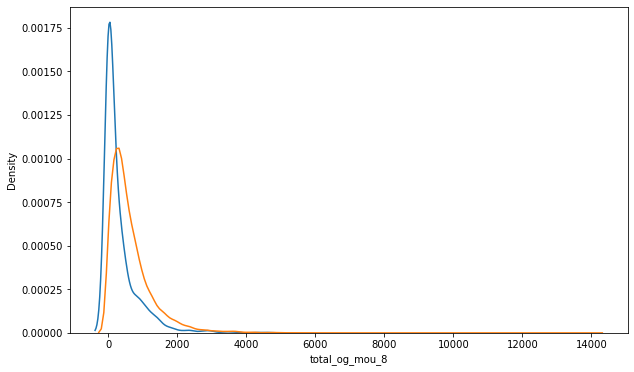

In [176]:
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['total_og_mou_8'],label='churn',hist=False)
sns.distplot(data_non_churn['total_og_mou_8'],label='not churn',hist=False)
plt.show()

Here also, the churn customers are popilated towards the lower end whereas, the non- churn have a wider spread

Similarly we can plot each variables, which have higher coefficients, churn distribution.